In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
y=pd.read_csv('Linear_Y_Train.csv')
x=pd.read_csv('Linear_X_Train.csv')
x=x.values
y=y.values
u=x.mean()
std=x.std()
x=(x-u)/std

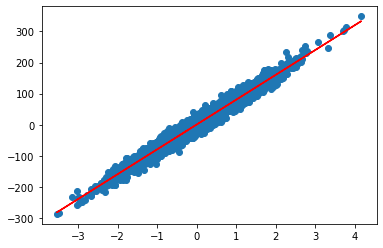

In [75]:
def hypothesis(x,theta):
    y_=theta[0]+theta[1]*x
    return y_
def gradient(x,y,theta):
    m=x.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        y_=hypothesis(x[i],theta)
        grad[0]+=(y_-y[i])
        grad[1]+=(y_-y[i])*x[i]
    return grad/m
def error(x,y,theta):
    total_error=0.0
    m=x.shape[0]
    for i in range(m):
        y_=hypothesis(x[i],theta)
        total_error+=(y_-y[i])**2
    return total_error/m
def gradientdecent(x,y,learning_rate=0.1,step=100):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(step):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,error_list

theta,error_list=gradientdecent(x,y)
y_=hypothesis(x,theta)
plt.scatter(x,y)
plt.plot(x,y_,color="red")

In [77]:
x_test=pd.read_csv('Linear_X_Test.csv').values
y_test=hypothesis(x_test,theta)
df=pd.DataFrame(data=y_test,columns=["y"])

In [80]:
df.to_csv("y_prediction.csv",index=False)